In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn_pandas import gen_features

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import umap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("hypertension_data.csv")

In [8]:
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [9]:
df.dropna(inplace=True)


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['slope' , 'ca' , 'thal' , 'restecg' , 'cp']
bin = ['sex', 'fbs', 'exang']

numeric_transformations = gen_features(
    columns=[[col] for col in numeric_features],
    classes=[
        {'class': SimpleImputer, 'strategy': 'median'},
        {'class': StandardScaler}
    ]
)

categorical_transformations = gen_features(
    columns=[[col] for col in categorical_features],
        classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
        {'class': OneHotEncoder}
    ]
)
bin_trans = gen_features(
    columns=[[col] for col in bin],
        classes=[
        {'class': SimpleImputer, 'strategy': 'median'},
    ]
)

preprocessor = DataFrameMapper(
    numeric_transformations + categorical_transformations + bin_trans,
    df_out=True, default=False
)

X_train_prepr = preprocessor.fit_transform(X_train)
X_test_prepr = preprocessor.transform(X_test)

In [13]:
X_train_prepr

age  trestbps      chol   thalach   oldpeak  slope_0  slope_1  \
2144   0.157582 -0.370220 -0.513112 -0.244307 -0.544525      0.0      1.0   
5987  -0.171702 -1.220043 -0.141460 -1.029172  1.515305      0.0      1.0   
22332  1.408859 -0.086946 -0.239263  1.107404 -0.372873      0.0      1.0   
24653  0.816149  1.612698 -0.356627 -0.505929  1.086174      0.0      0.0   
24355  0.684436  1.612698  0.777890 -1.814037  0.399564      0.0      1.0   
...         ...       ...       ...       ...       ...      ...      ...   
10465  1.079576 -1.503317 -0.943445  0.802179 -0.887830      0.0      0.0   
12988 -0.039988  1.159460  0.601844  0.976593 -0.887830      0.0      0.0   
6193   0.684436  2.632485 -0.356627  0.671368 -0.029568      0.0      1.0   
3358  -0.039988  0.366292 -0.200142  0.104521 -0.716178      0.0      1.0   
14117  0.025868  0.479602 -0.219702  1.325422 -0.887830      0.0      0.0   

       slope_2  ca_0  ca_1  ...  restecg_0  restecg_1  restecg_2  cp_0  cp_1  \
2144       0.0   0.0   0.0  ...        0.0        1.0        0.0   0.0   1.0   
5987       0.0   0.0   1.0  ...        0.0        1.0        0.0   1.0   0.0   
22332      0.0   1.0   0.0  ...        1.0        0.0        0.0   0.0   1.0   
24653      1.0   1.0   0.0  ...        1.0        0.0        0.0   1.0   0.0   
24355      0.0   0.0   0.0  ...        1.0        0.0        0.0   1.0   0.0   
...        ...   ...   ...  ...        ...        ...        ...   ...   ...   
10465      1.0   0.0   1.0  ...        0.0        1.0        0.0   0.0   1.0   
12988      1.0   0.0   1.0  ...        0.0        1.0        0.0   0.0   0.0   
6193       0.0   0.0   0.0  ...        0.0        1.0        0.0   1.0   0.0   
3358       0.0   1.0   0.0  ...        1.0        0.0        0.0   1.0   0.0   
14117      1.0   1.0   0.0  ...        1.0        0.0        0.0   0.0   0.0   

       cp_2  cp_3  sex  fbs  exang  
2144    0.0   0.0  0.0  0.0    0.0  
5987    0.0   0.0  0.0  0.0    1.0  
22332   0.0   0.0  0.0  0.0    0.0  
24653   0.0   0.0  1.0  0.0    0.0  
24355   0.0   0.0  1.0  0.0    1.0  
...     ...   ...  ...  ...    ...  
10465   0.0   0.0  1.0  0.0    0.0  
12988   1.0   0.0  1.0  0.0    0.0  
6193    0.0   0.0  0.0  1.0    1.0  
3358    0.0   0.0  1.0  0.0    1.0  
14117   1.0   0.0  0.0  0.0    0.0  

[15634 rows x 27 columns]

# Побудувати модель зменшення вимірності PCA 

In [32]:
pca = PCA()
pca.fit_transform(X)


array([[-1.25780015e+01,  1.07035180e+00,  1.41173040e+01, ...,
         6.63380802e-01,  6.85201577e-02,  5.96199908e-01],
       [ 3.50288571e+00, -3.67600109e+01,  2.18684097e+00, ...,
         7.29904816e-01, -2.01776869e-01, -1.22885472e-01],
       [-4.24364309e+01, -2.21808484e+01,  2.50275217e+00, ...,
        -8.23138199e-01, -1.63016560e-01, -2.59293379e-02],
       ...,
       [-1.38458634e+01, -8.32814364e+00, -2.95657096e+01, ...,
        -8.27767340e-02, -3.77428644e-01,  1.18501470e-01],
       [-1.31173146e+01, -1.14361176e+01,  2.48685089e+01, ...,
        -3.49203327e-01, -2.09817761e-01, -2.29510298e-01],
       [-1.03997909e+01, -2.35771708e+01,  1.77951901e+00, ...,
         5.86693545e-01, -2.85795355e-01, -2.70406174e-01]])

Провести аналіз explained variance для кожної компоненти та кумулятивно, оцінити оптимальну кількість компонент;

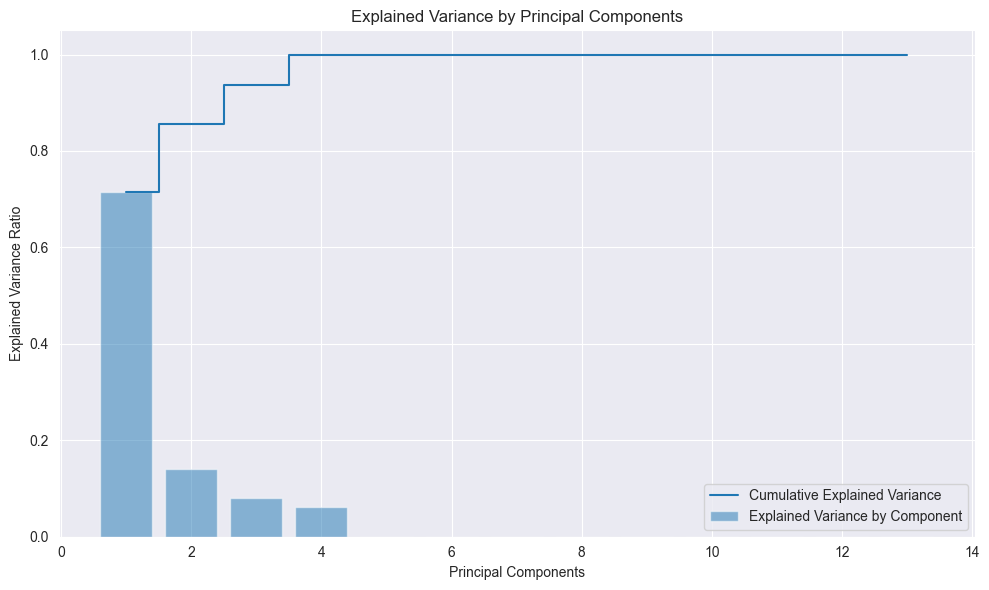

In [33]:
# Аналіз explained variance для кожної компоненти
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Візуалізація explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Explained Variance by Component')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Зменшити вимірність до двох компонент (або вибрати перші дві компоненти з вже навченого PCA) та побудувати візуалізацію об’єктів у новому просторі (колір точки повинен залежати від таргет-змінної);

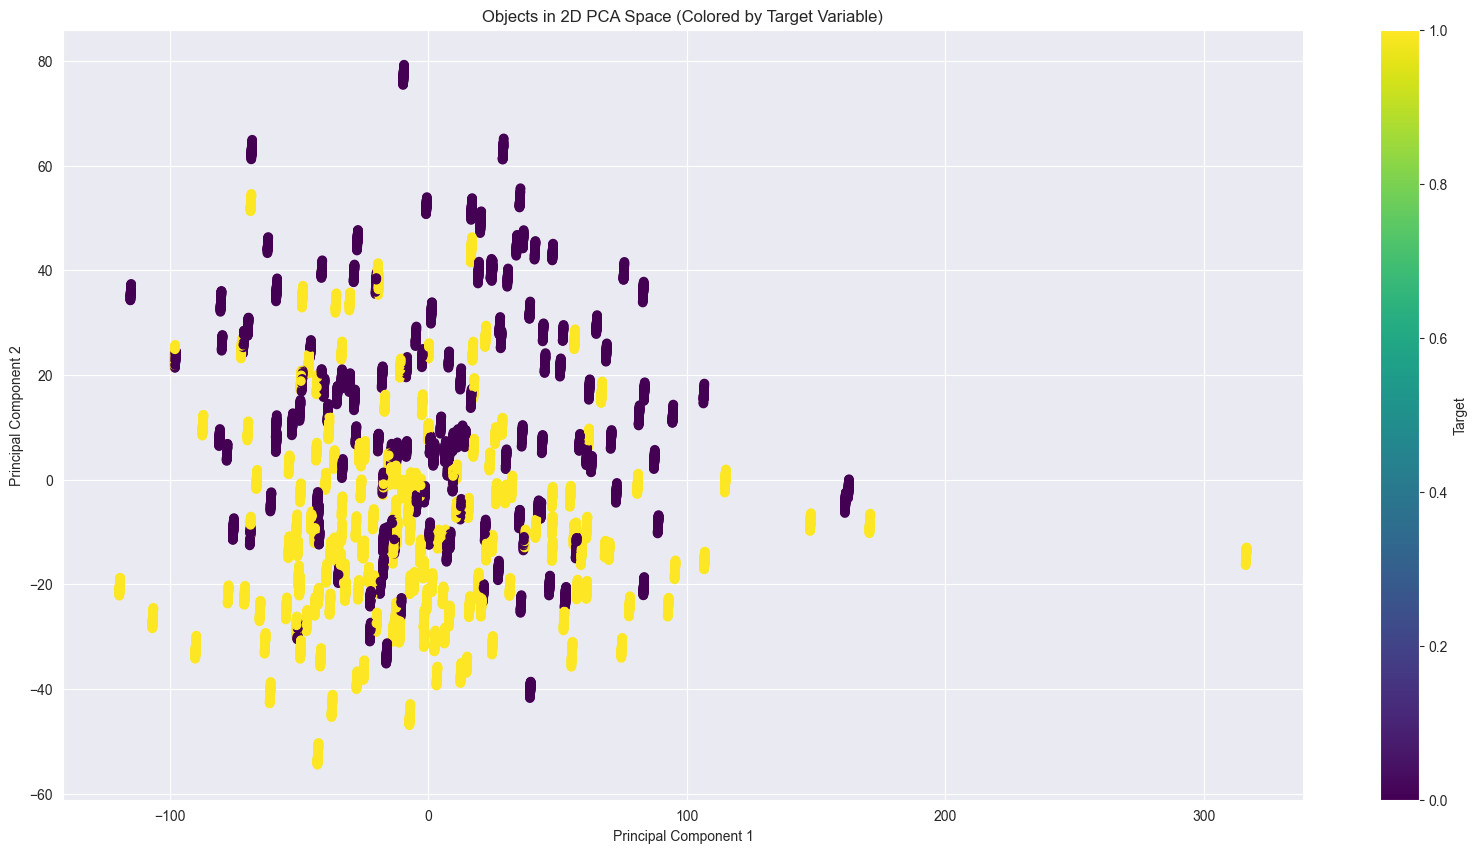

In [18]:
# Зменшення вимірності до двох компонент
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Візуалізація об'єктів у новому просторі
plt.figure(figsize=(20, 10))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis')
plt.title('Objects in 2D PCA Space (Colored by Target Variable)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()


# Обрати дві моделі нелінійного зменшення вимірності на базі многовидів [API: 3, 4]:


G:\Ilya\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "G:\Ilya\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


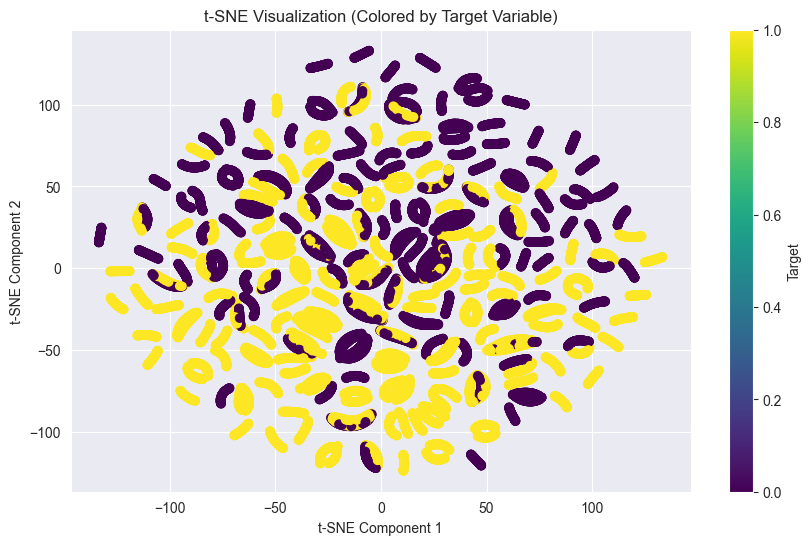

In [19]:
# Ініціалізуємо модель t-SNE з 2 компонентами
tsne = TSNE(n_components=2, random_state=42)


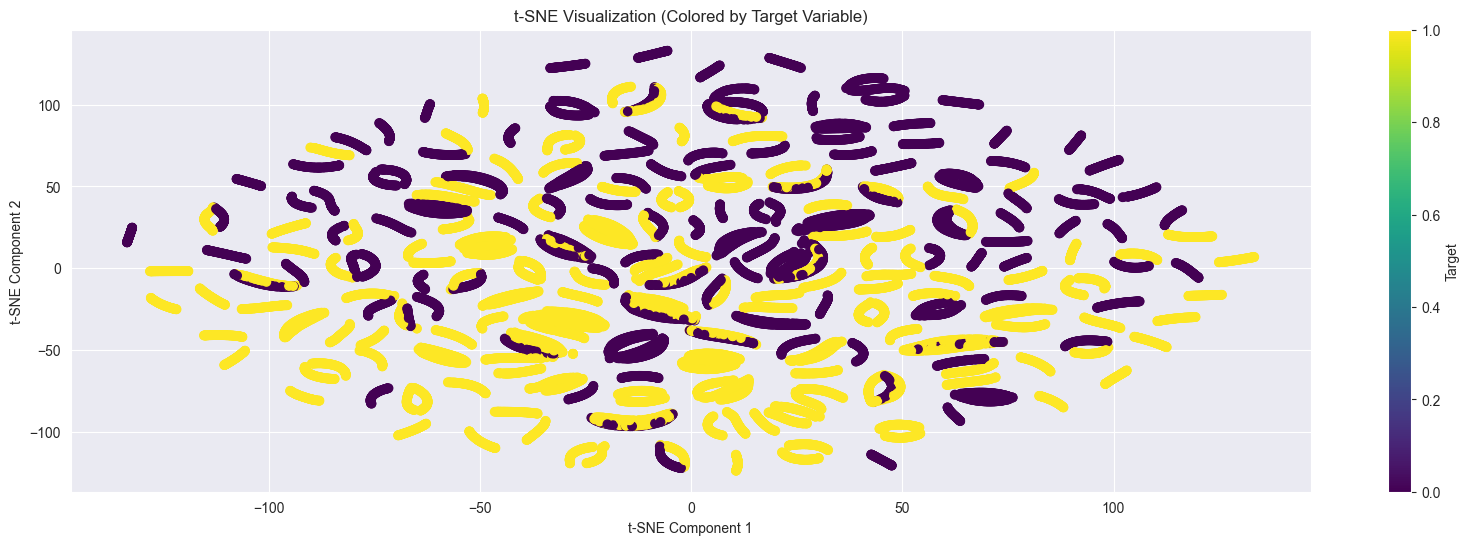

In [20]:
# Зменшення вимірності та візуалізація результату
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(20, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization (Colored by Target Variable)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()

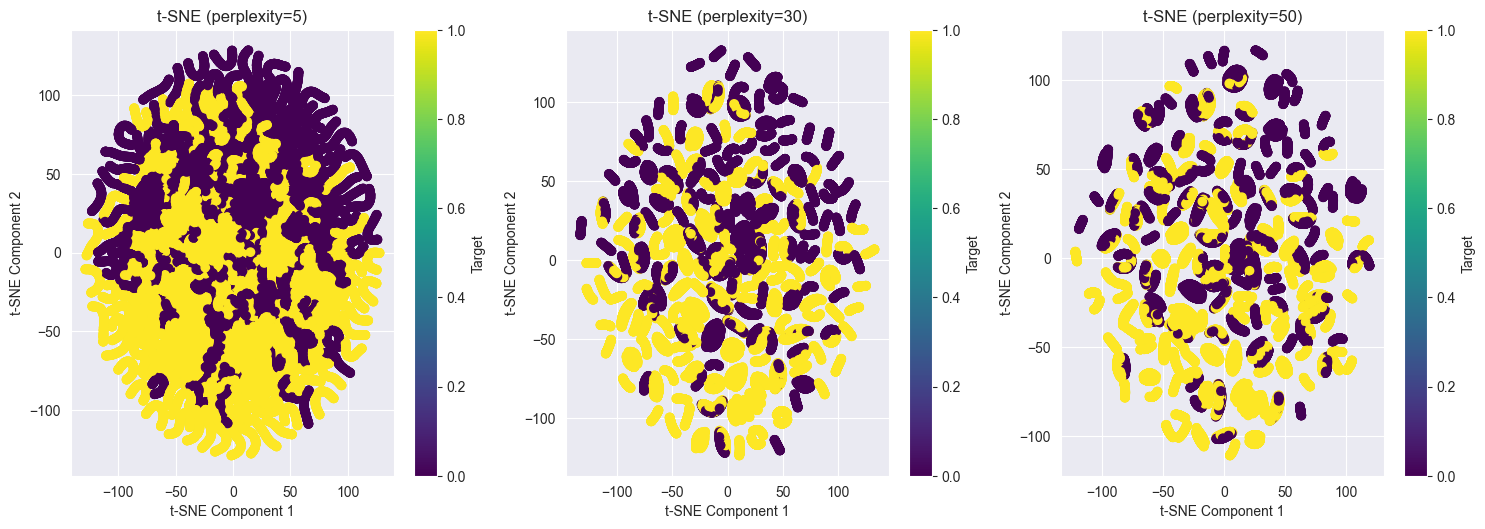

In [21]:

perplexity_values = [5, 30, 50]

plt.figure(figsize=(30, 14))
for i, perplexity in enumerate(perplexity_values, 1):
    tsne_model = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    
    X_tsne = tsne_model.fit_transform(X)
    
    plt.subplot(2, 3, i)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title(f't-SNE (perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Target')

plt.tight_layout()
plt.show()

G:\Ilya\ML\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


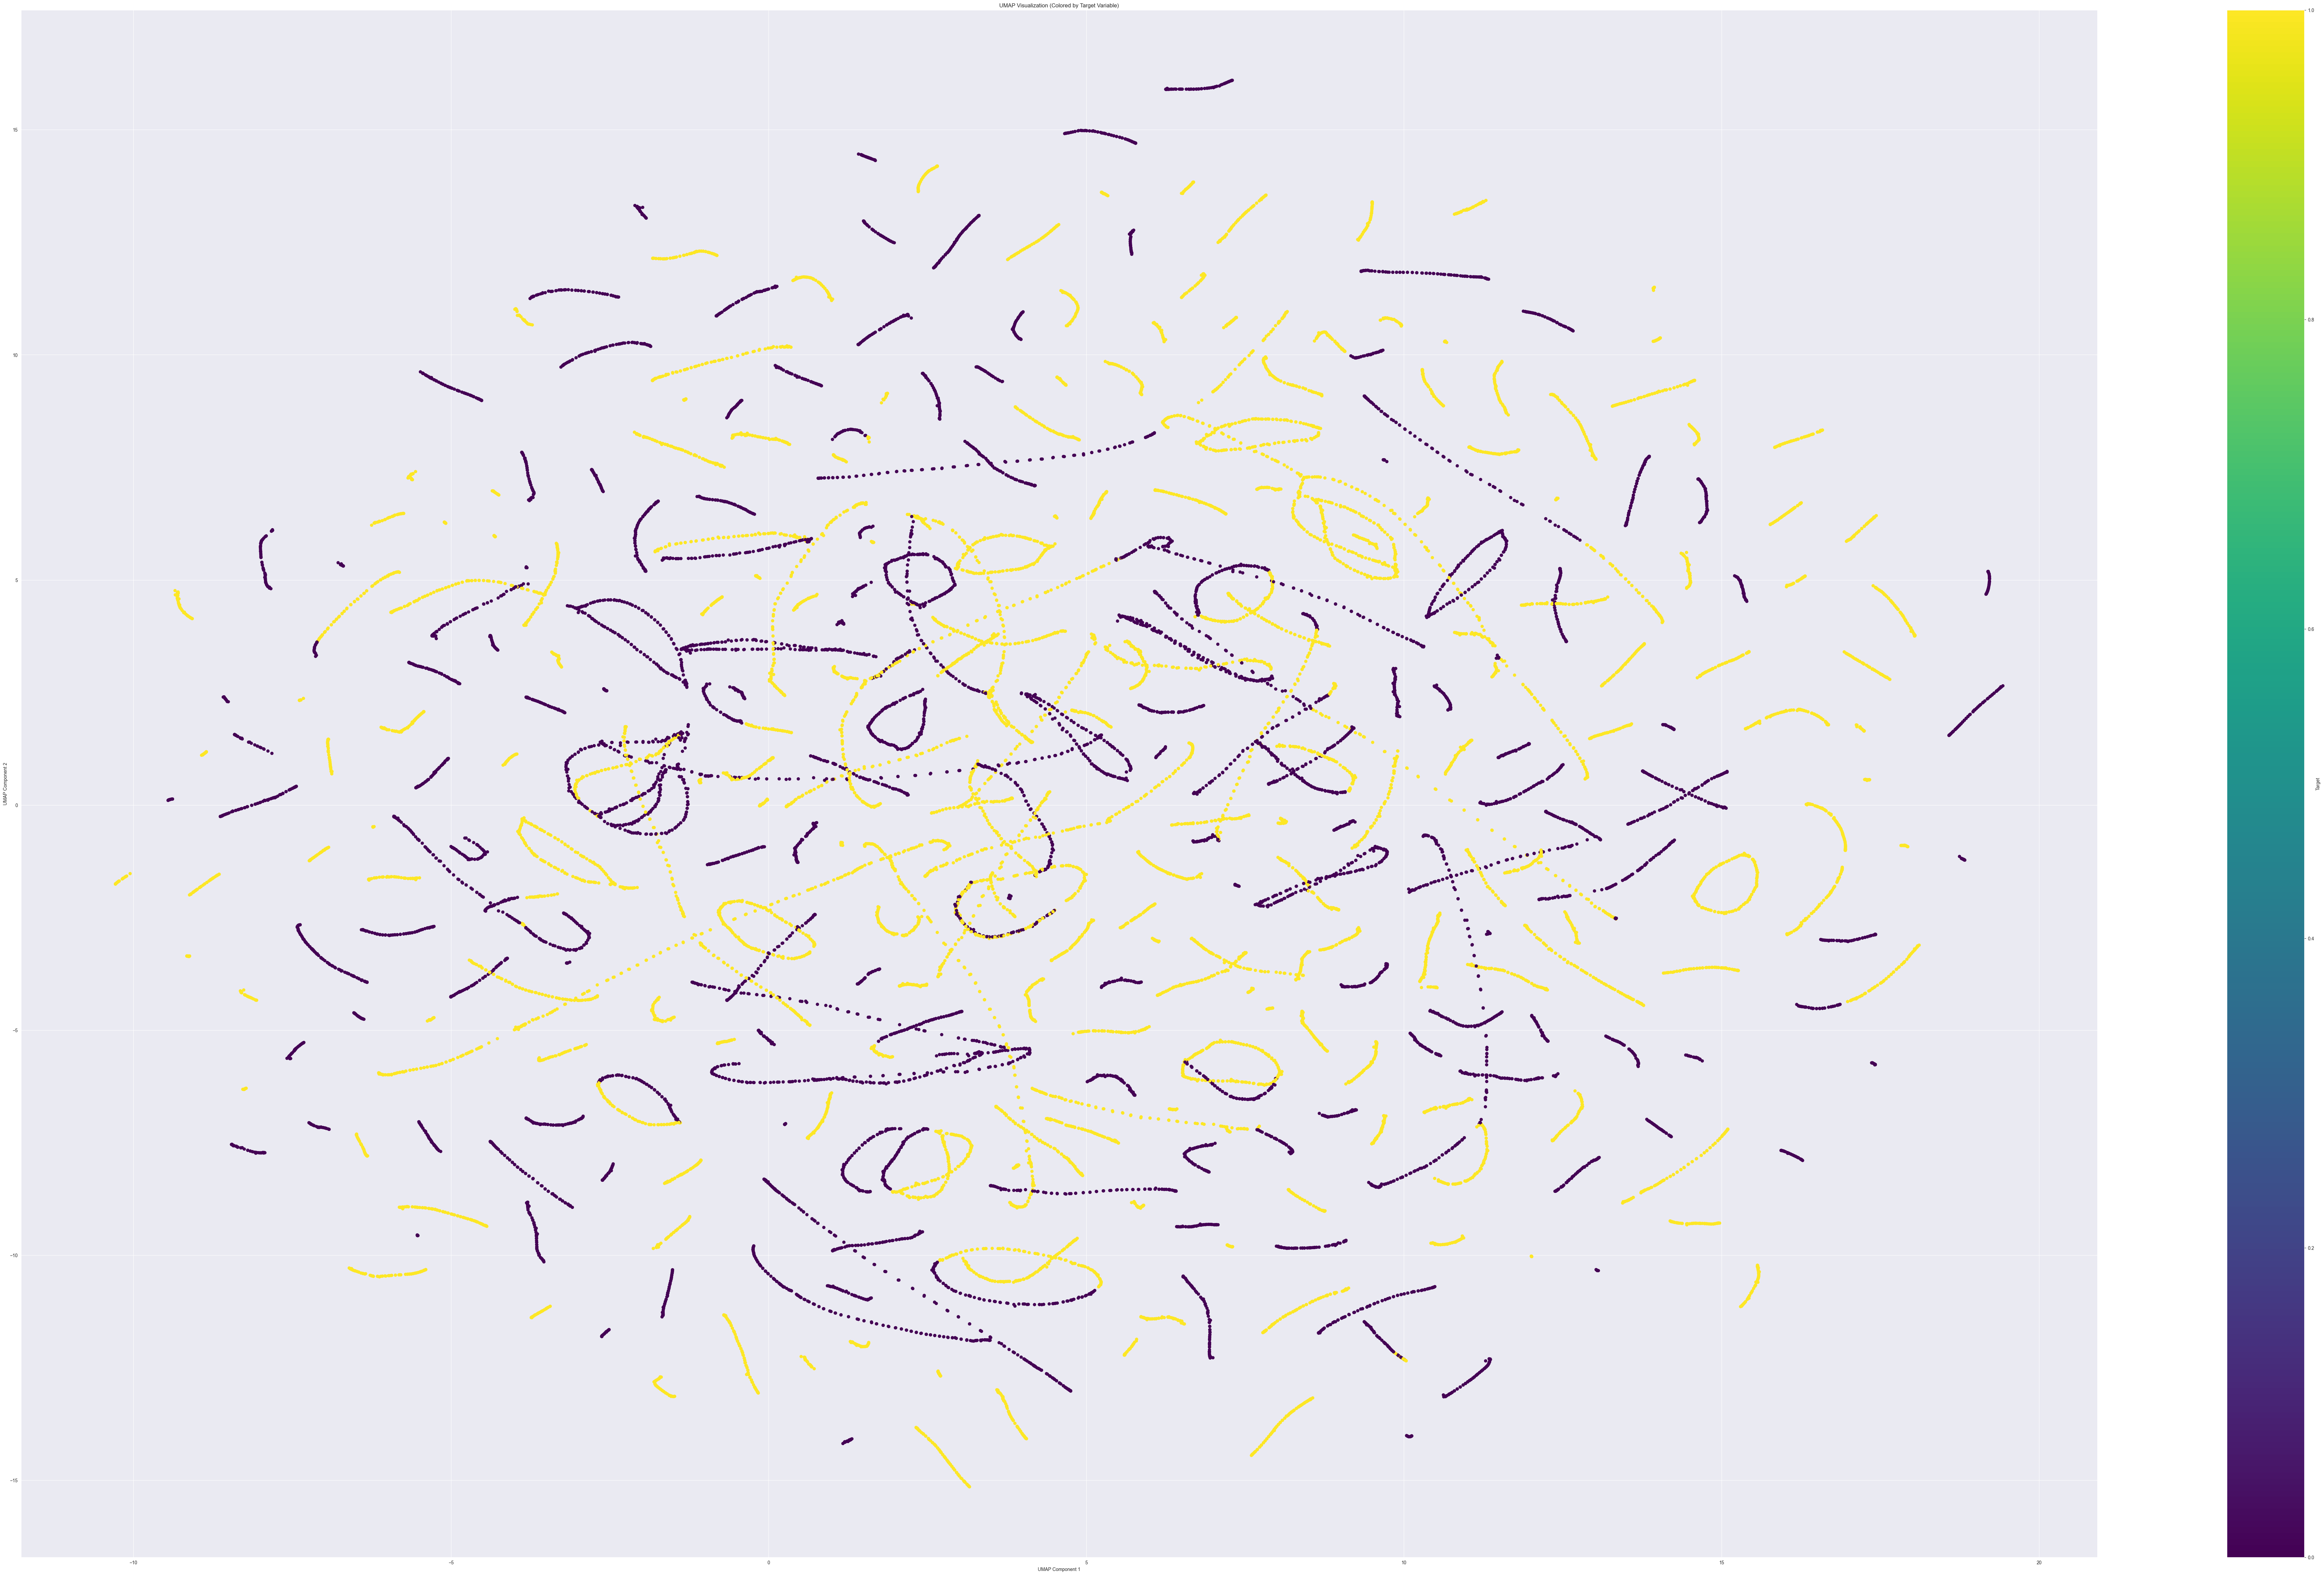

In [23]:
# Ініціалізуємо модель UMAP з 2 компонентами
umap_model = umap.UMAP(n_components=2, random_state=42)

# Зменшення вимірності та візуалізація результату
X_umap = umap_model.fit_transform(X)
plt.figure(figsize=(100, 60))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.title('UMAP Visualization (Colored by Target Variable)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Target')
plt.show()

G:\Ilya\ML\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 31 with accuracies 
[4.58928537e-06 3.94898097e-06 3.09836450e-06 1.47998177e-05]
not reaching the requested tolerance 3.3229589462280273e-06.
Use iteration 31 instead with accuracy 
6.609112129049051e-06.

  _, diffusion_map = lobpcg(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[4.58928533e-06 3.94898102e-06 3.09836449e-06 1.47998177e-05]
not reaching th

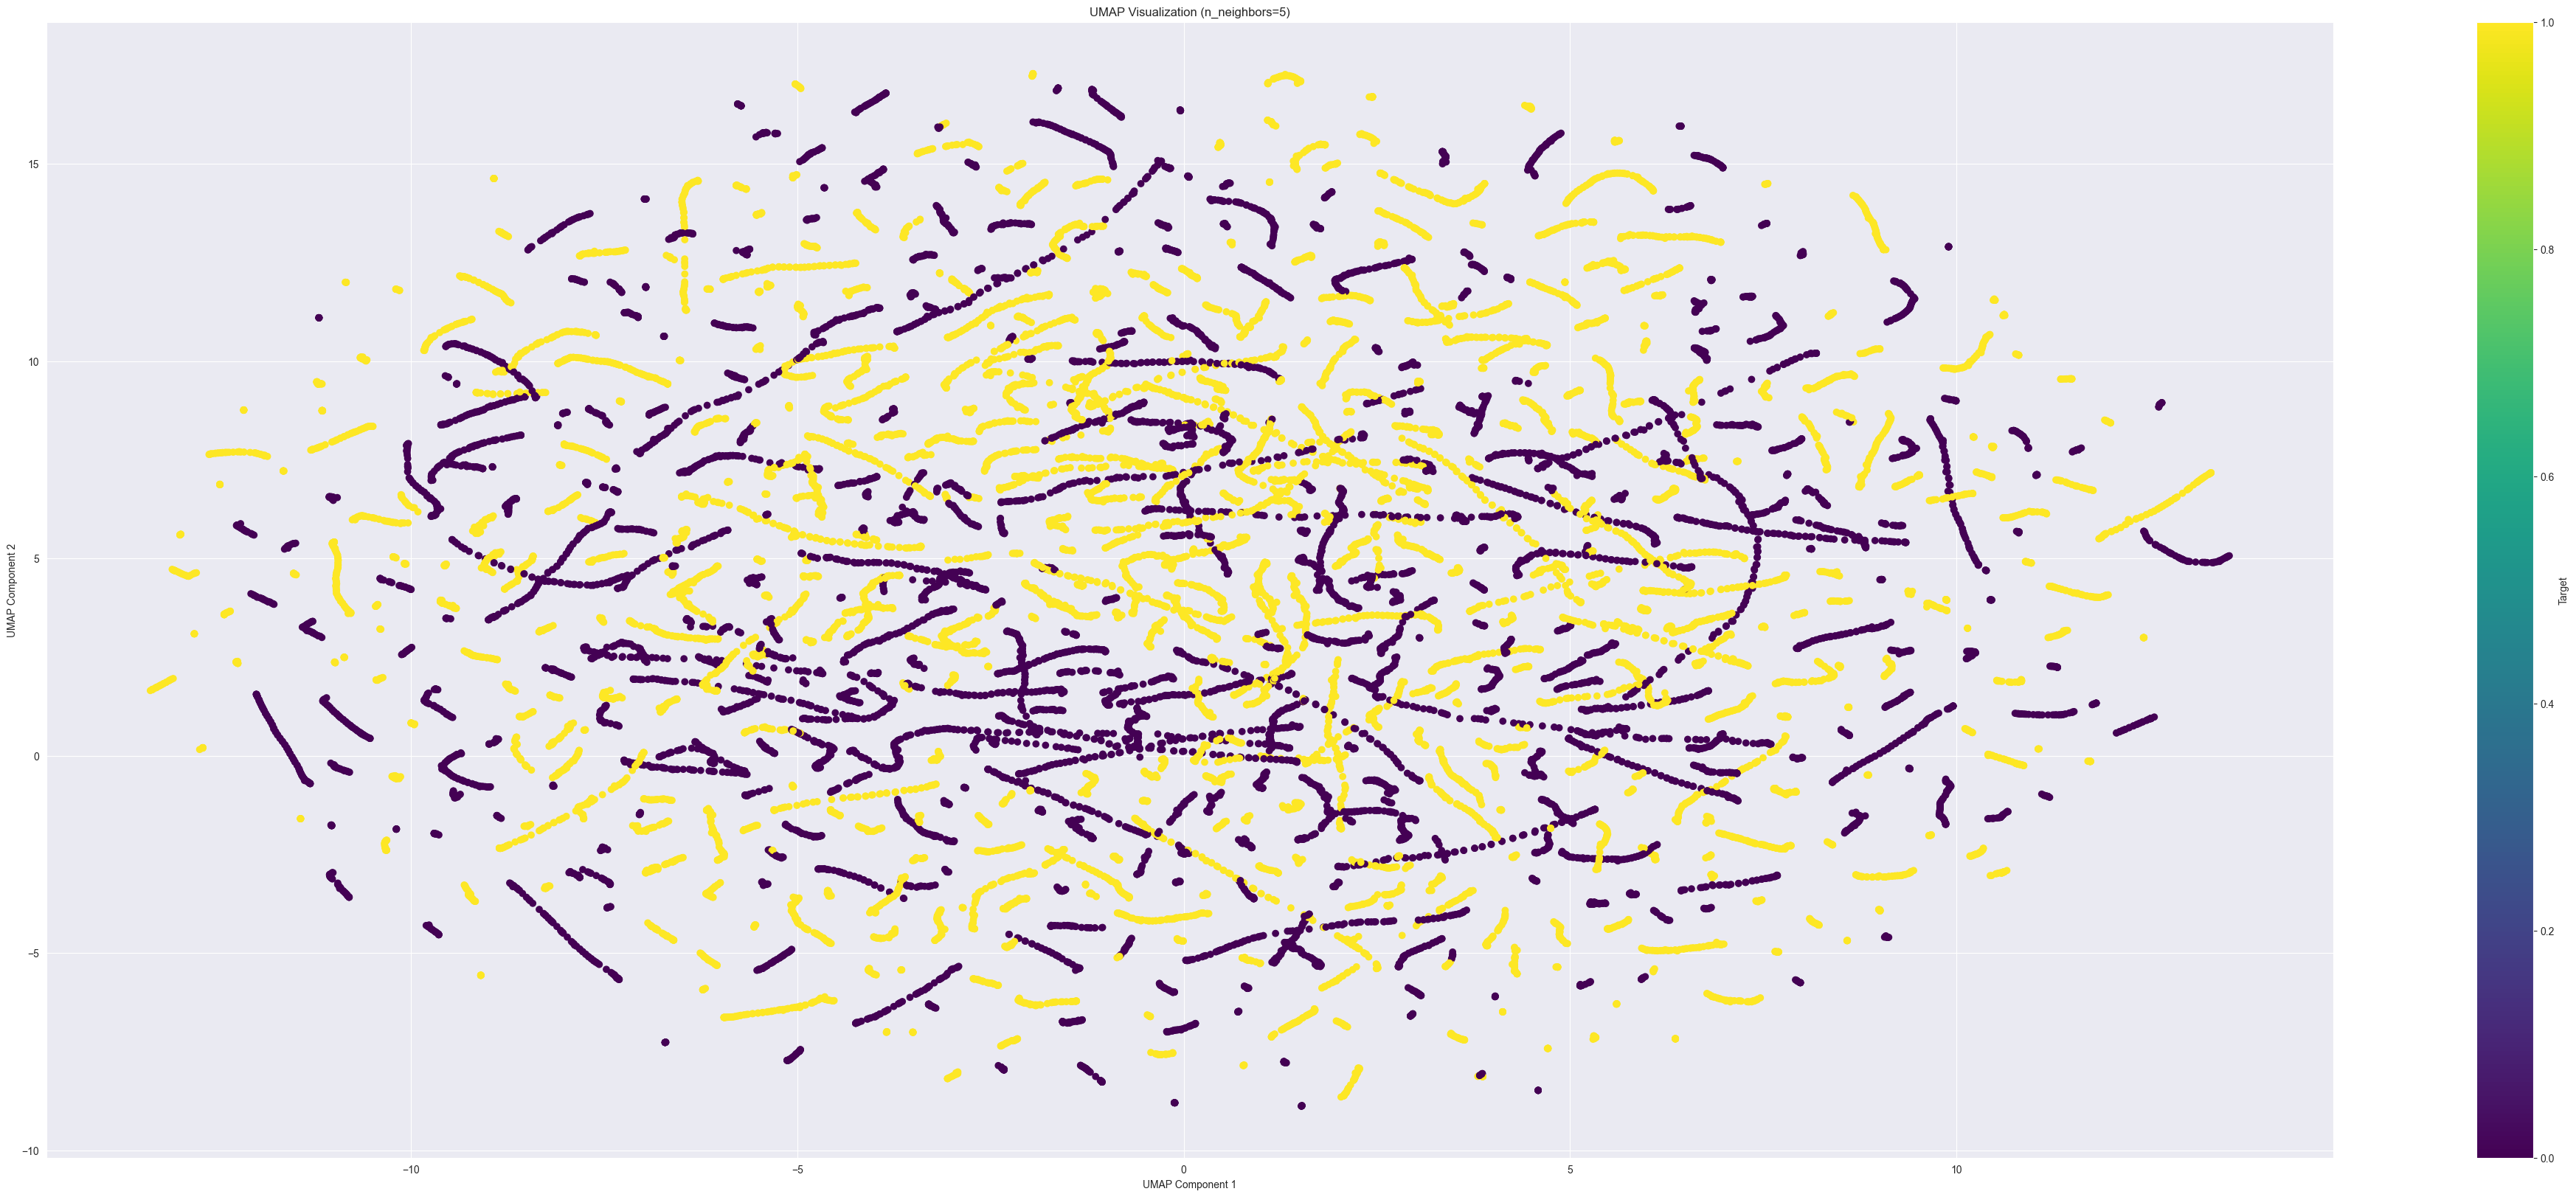

G:\Ilya\ML\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


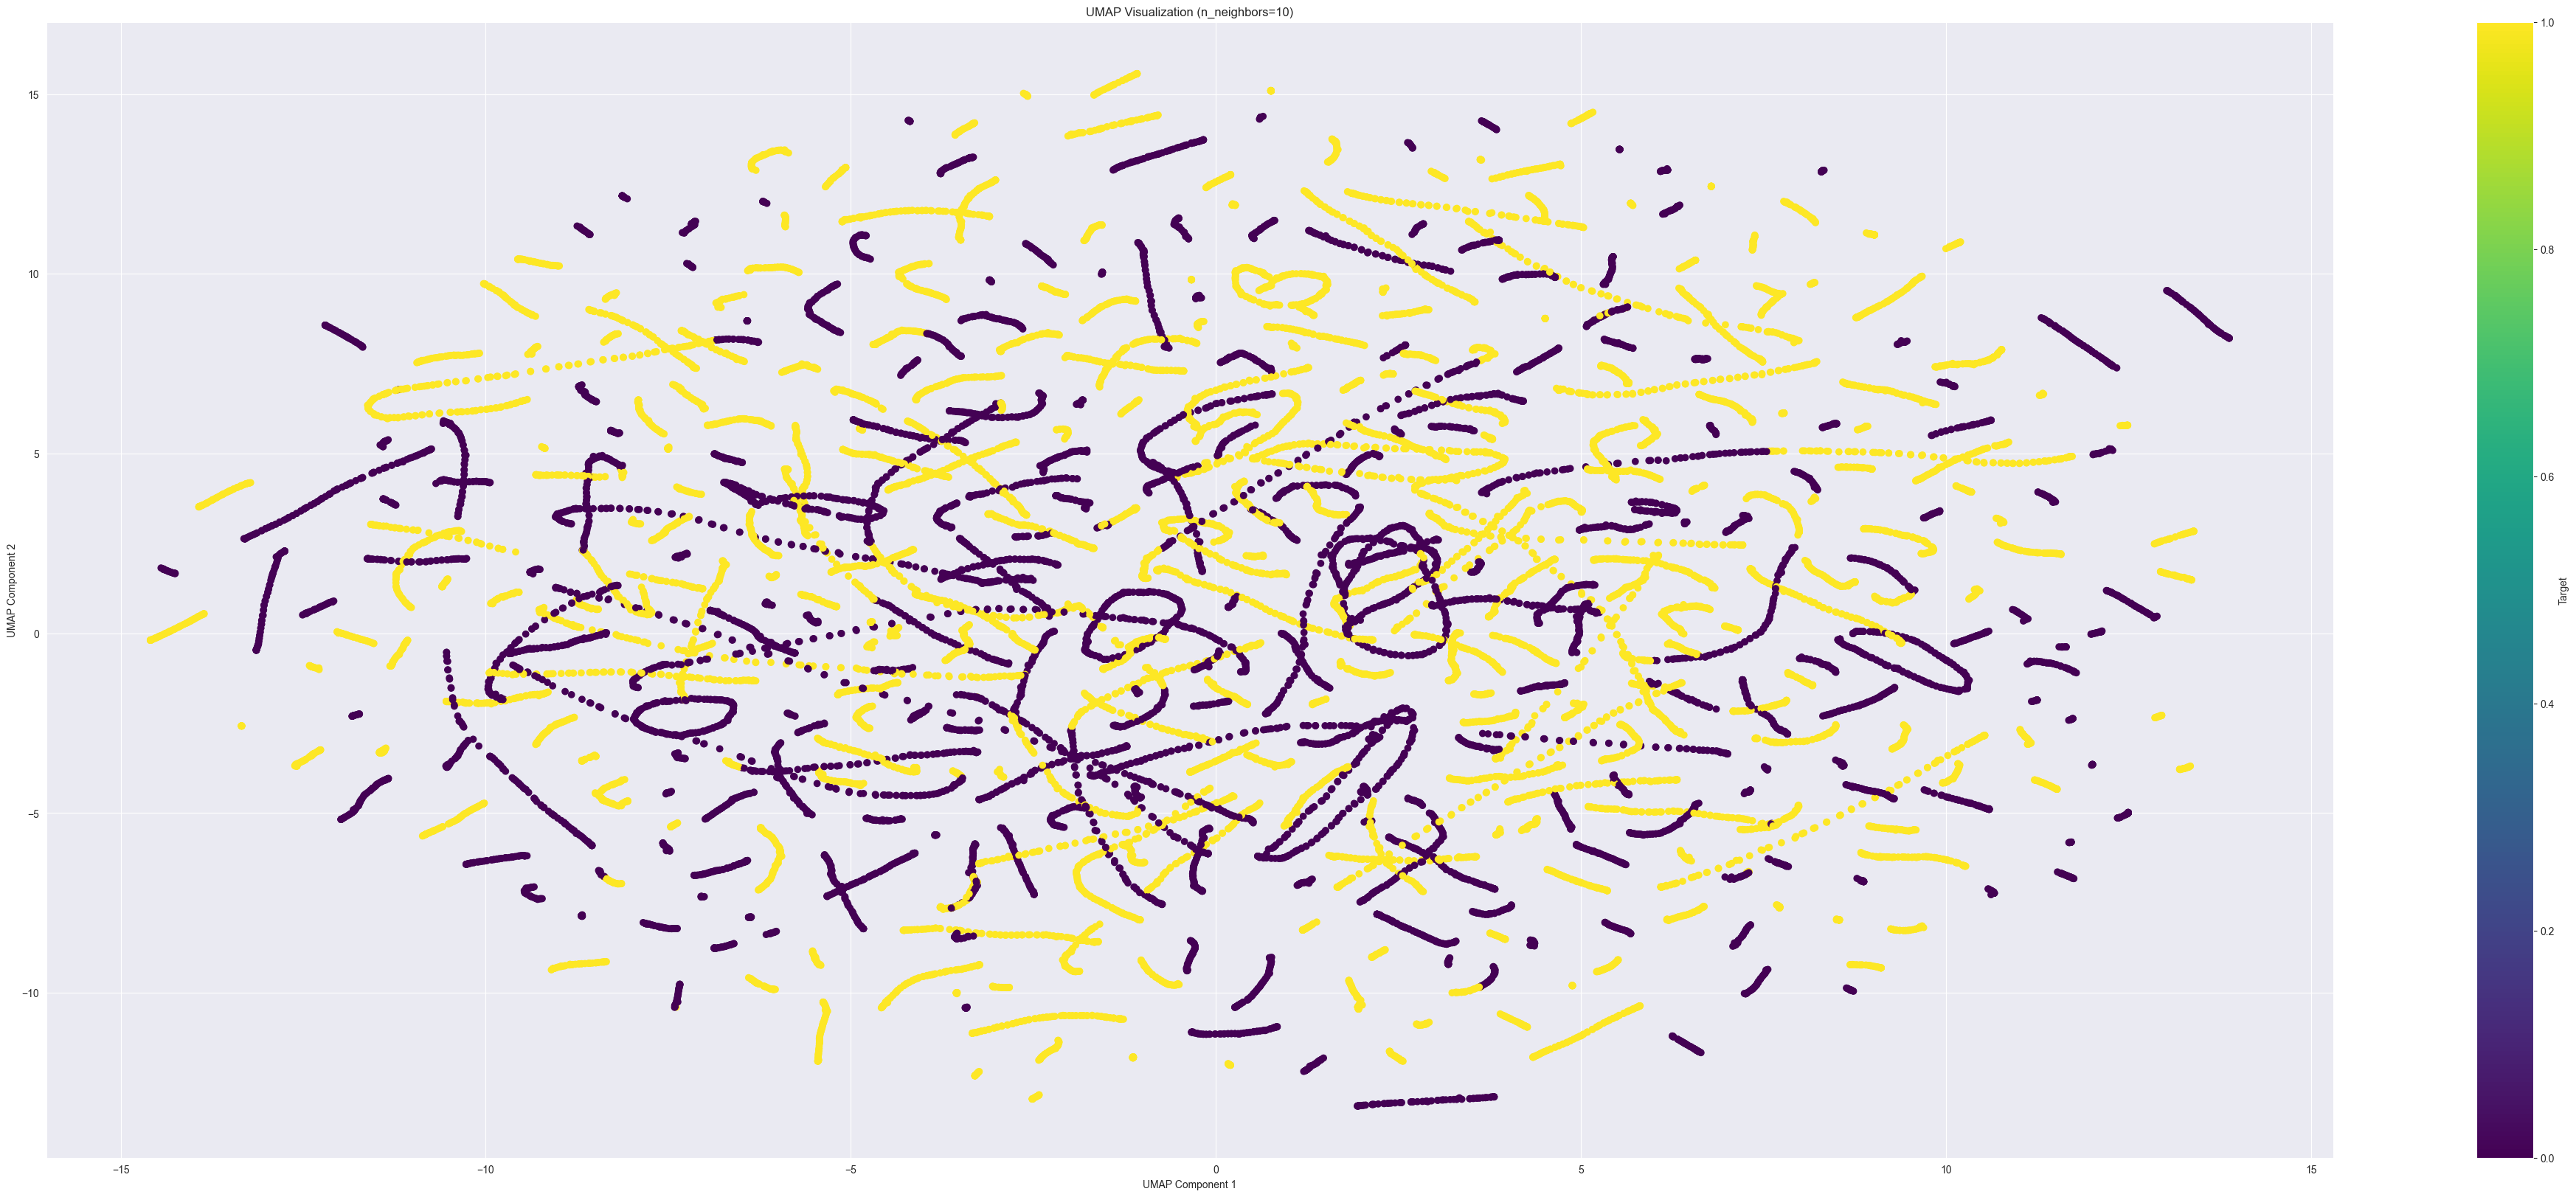

G:\Ilya\ML\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


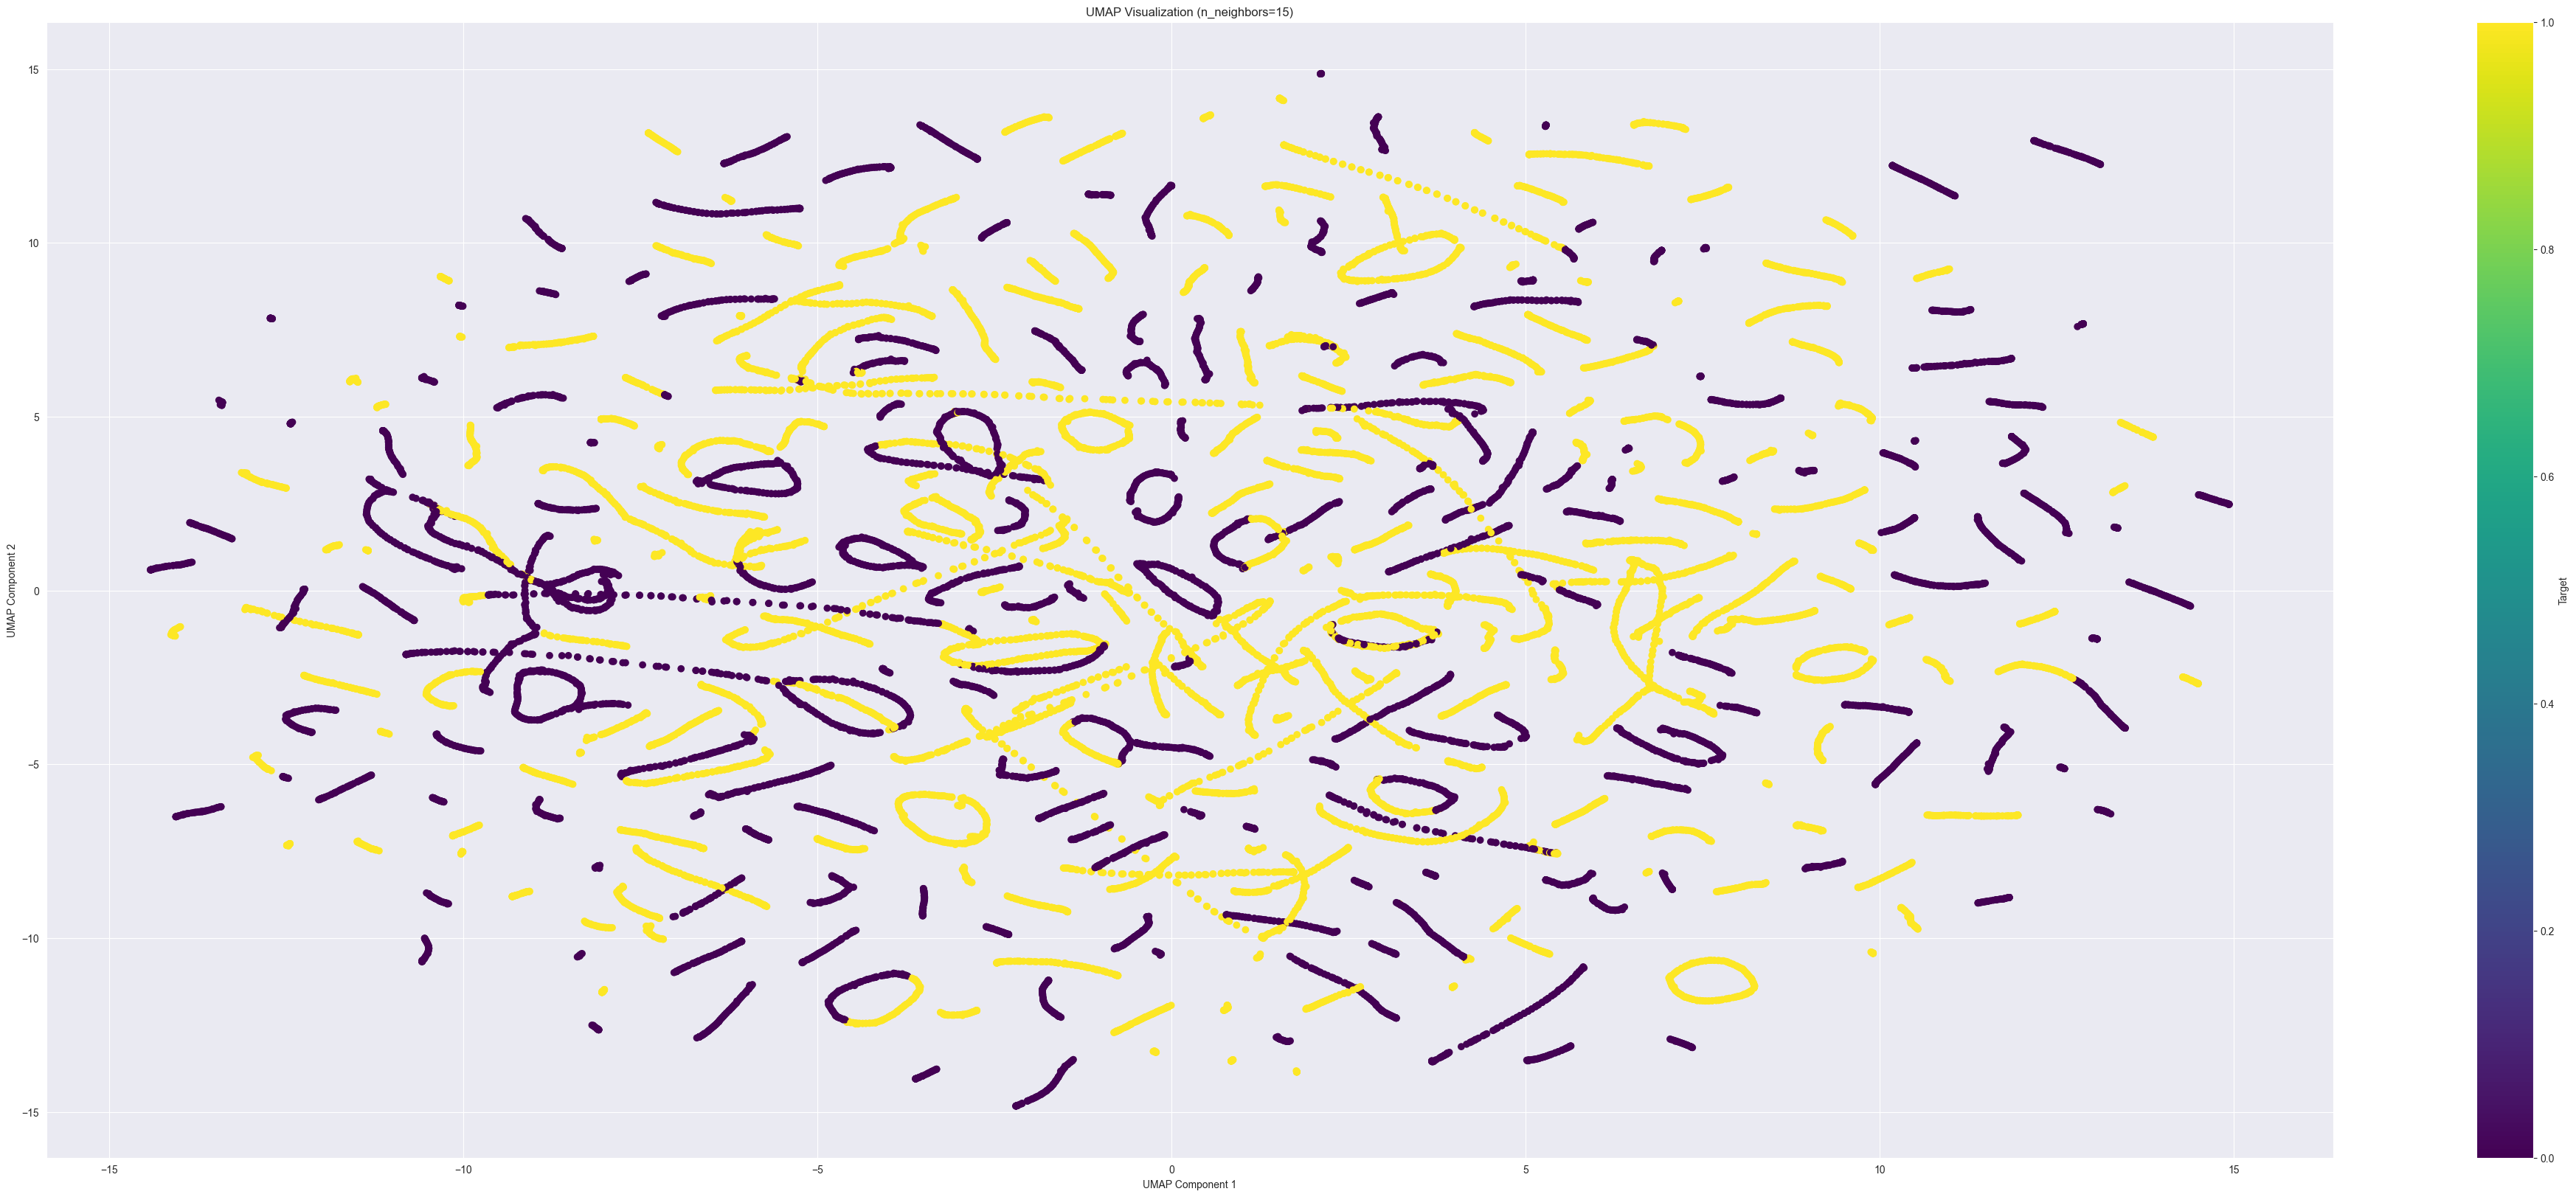

G:\Ilya\ML\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
G:\Ilya\ML\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


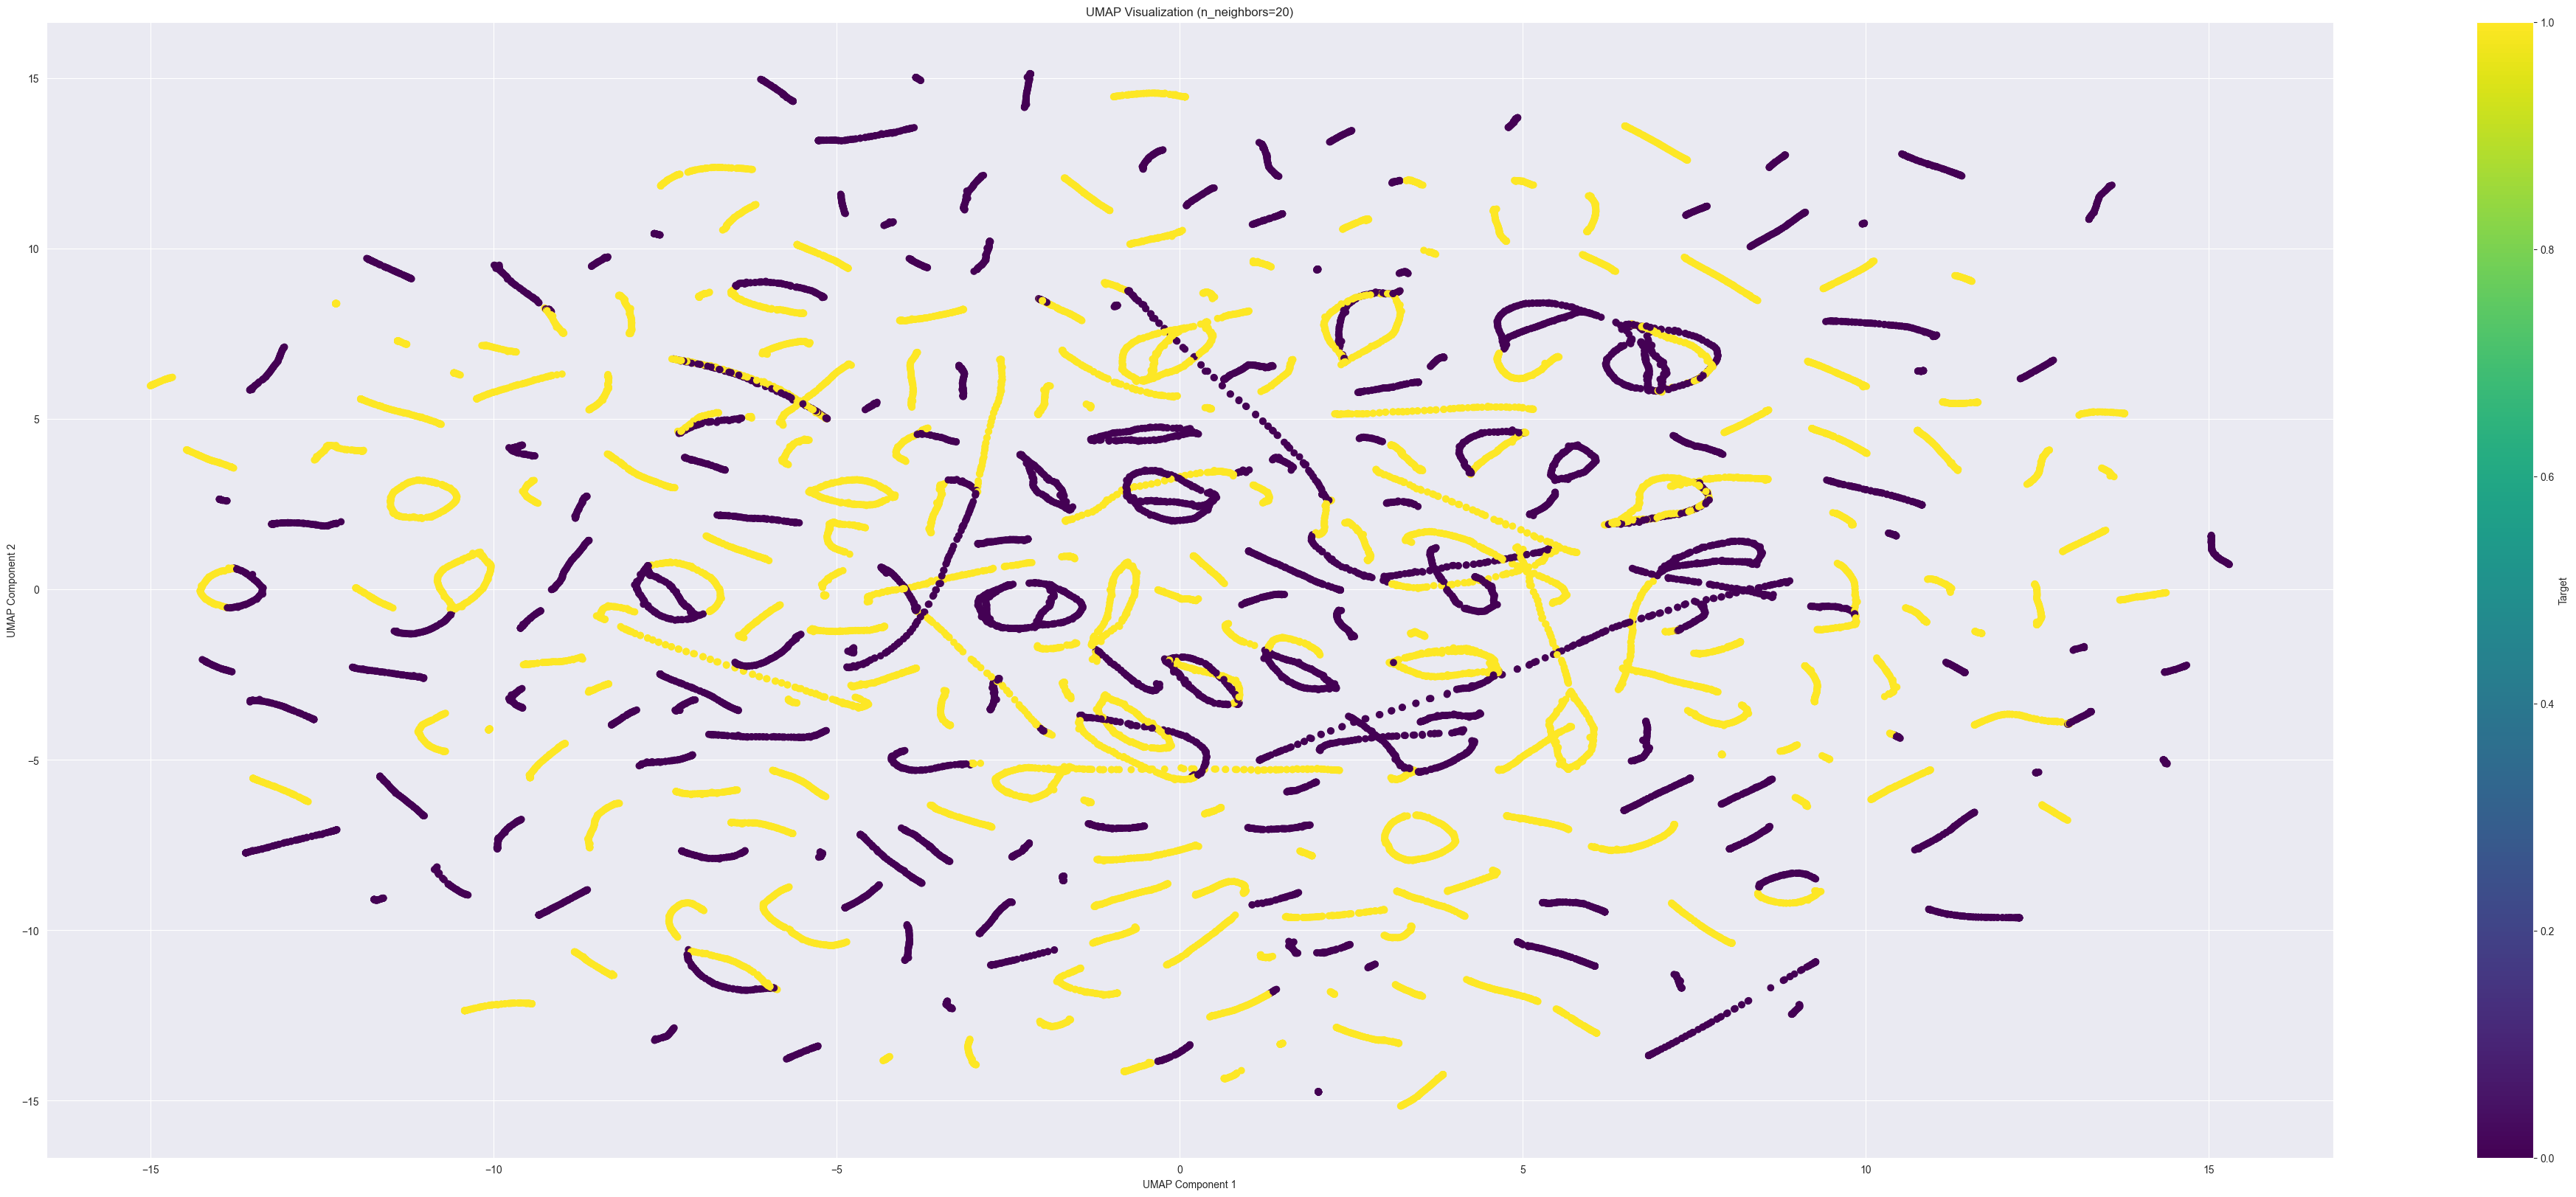

In [24]:
# Список значень n_neighbors, які ви бажаєте перевірити
n_neighbors_values = [5, 10, 15, 20]

# Побудова UMAP та візуалізація для кожного значення n_neighbors
for n_neighbors in n_neighbors_values:
    umap_model = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_umap = umap_model.fit_transform(X)
    
    plt.figure(figsize=(50, 20))
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    plt.title(f'UMAP Visualization (n_neighbors={n_neighbors})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(label='Target')
    plt.show()

ф

# Побудувати модель бінарної класифікації (лог. регресію) зі зменшенням вимірності:


In [25]:
pipeline = Pipeline([
    ('pca', pca),  # Використовуємо вже навчений PCA
    ('clf', LogisticRegression(random_state=42))
])

parameters = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Регуляризаційний параметр логістичної регресії
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train_prepr, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Найкращі параметри: {best_params}')
print(f'Найкращий результат: {best_score}')

# Отримання оптимального пайплайну
optimal_pipeline = grid_search.best_estimator_

Найкращі параметри: {'clf__C': 0.001}
Найкращий результат: 0.7952542004594986


In [26]:
y_pred = optimal_pipeline.predict(X_test_prepr)
y_pred_proba = optimal_pipeline.predict_proba(X_test_prepr)[:, 1]

binary_crossentropy = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Виведення результатів
print(f'Binary Crossentropy: {binary_crossentropy:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F₁ Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Binary Crossentropy: 0.4598
Accuracy: 0.7885
Precision: 0.7798
Recall: 0.8553
F₁ Score: 0.8158
ROC AUC: 0.8647


 Model  Binary Crossentropy  Accuracy  Precision    Recall  F1 Score  \
0      Log             0.326110  0.869178   0.853980  0.918096  0.884878   
1      SVC             0.204707  1.000000   1.000000  1.000000  1.000000   
2  SVC_Lin             0.547558  0.765862   0.714211  0.954323  0.816990   

    ROC AUC  
0  0.931558  
1  1.000000  
2  0.897614